## Testowanie/Prezentacja działania wybranych napisanych funkcji 

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from imp import reload 

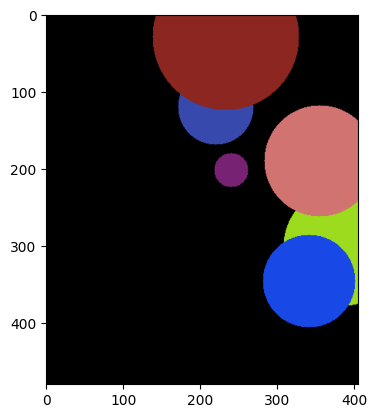

In [274]:
import individual
reload(individual)
from individual import Individual

def test_convert_to_pixels_array():    
    indiv = Individual()
    indiv.generate_random_inidividual()
    indiv.show_image()

test_convert_to_pixels_array()

rozmiar obrazka to:  480 405
odlegosc od prawdziwej perły to  67.9589083405


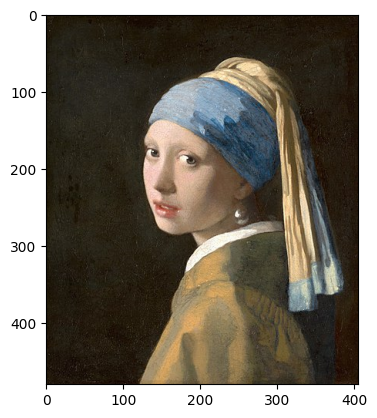

In [3]:
import utils
reload(utils)
from utils import Utils

def test_objective_function():
    monalisa_utils = Utils('pics/GirlwithaPearl.jpg')
    plt.imshow(monalisa_utils.objective_picture)
    print("rozmiar obrazka to: ", monalisa_utils.length, monalisa_utils.width)

    random_picture = Individual()
    random_picture.generate_random_inidividual()

    objective_value = monalisa_utils.objective_function(random_picture)
    print("odlegosc od prawdziwej perły to ", objective_value)

test_objective_function()

In [ ]:
reload(utils)
from utils import Utils

def test_crossover():
    monalisa_utils = Utils('GirlwithaPearl.jpg')
    print('pstwo mutacji to: ', monalisa_utils.mutation_probability)

    random_parents = monalisa_utils.create_initial_population(2)
    children = monalisa_utils.create_children_population(random_parents, np.array([0,1]))
    
    p1, p2 = random_parents.population[0], random_parents.population[1]
    child1, child2 = children.population[0], children.population[1] 
    return p1, p2, child1, child2 

x1, x2, c1, c2 = test_crossover()

In [ ]:
print('parent1: ')
x1.show_image()

In [ ]:
print('parent2: ')
x2.show_image()

In [ ]:
print('child1: ')
c1.show_image()

In [ ]:
print('child2: ')
c2.show_image()

startuje ewolucje !
genracja nr:  0 , bestobj value:  57.1915128
genracja nr:  10 , bestobj value:  48.843950984
genracja nr:  20 , bestobj value:  46.9514153862
juz od  10 nic sie nie zmienia !
genracja nr:  30 , bestobj value:  45.4365495013
genracja nr:  40 , bestobj value:  45.0915334092
juz od  10 nic sie nie zmienia !
genracja nr:  50 , bestobj value:  44.7164688787
genracja nr:  60 , bestobj value:  44.2988898601
juz od  10 nic sie nie zmienia !
genracja nr:  70 , bestobj value:  44.0106106361
genracja nr:  80 , bestobj value:  43.6476414665
juz od  10 nic sie nie zmienia !
genracja nr:  90 , bestobj value:  43.561639792
juz od  10 nic sie nie zmienia !
genracja nr:  100 , bestobj value:  43.5663716189
juz od  10 nic sie nie zmienia !
genracja nr:  110 , bestobj value:  43.5549927903
juz od  10 nic sie nie zmienia !
genracja nr:  120 , bestobj value:  43.5544891703
juz od  10 nic sie nie zmienia !
genracja nr:  130 , bestobj value:  43.6008471345
juz od  10 nic sie nie zmienia !

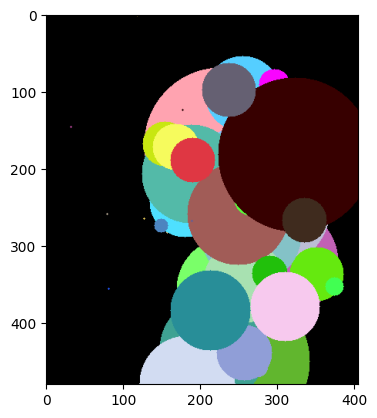

In [12]:
import evolution
reload(evolution)
from evolution import Evolution

def test_evolution():
    pearl_evolution = Evolution()
    best_picture, statistics = pearl_evolution.evolve()

    best_picture.show_image()

test_evolution()

### Nowy rodzaj mutacji - delikatnie coś pozmieniaj 

In [ ]:
import individual
reload(individual)
from individual import Individual

import splash
reload(splash)
from splash import Splash

x = Individual()
plameczka = Splash()
plameczka.random_splash(Splash.INITIAL_MAX_RANK, Splash.LENGTH, Splash.WIDTH)

x.splash_parameters = [plameczka]
x.pixels_array = x.convert_to_pixels_array()

x.show_image()

In [ ]:
import splash
reload(splash)
from splash import Splash


plameczka.change_slightly(Splash.RADIUS)
x.pixels_array = x.convert_to_pixels_array()

x.show_image()

bede zmienial:  0
zmieniam kolor o  [-40 -16  -8]
[[143, 12, 109]]
[[103, 255, 101]]


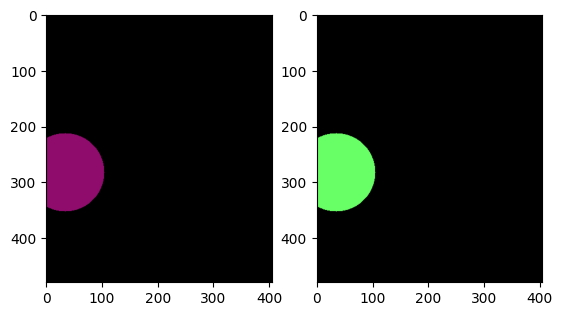

In [46]:
import copy 

import individual
reload(individual)
from individual import Individual
from population import Population

import utils
reload(utils)
from utils import Utils

x = Individual()
x.generate_random_inidividual()

# f, axarr = plt.subplots(3,2)
# axarr[2, 0].imshow(x.convert_to_pixels_array())
f, axarr = plt.subplots(1,2)
axarr[0].imshow(x.convert_to_pixels_array())

pearl_utils = Utils('pics/GirlwithaPearl.jpg')

children = Population()
for _ in range(1):
    new_child = copy.deepcopy(x)
    children.extend(pearl_utils.mutate_slightly(new_child))
    
# axarr[0, 0].imshow(children.population[0].convert_to_pixels_array())
# axarr[0, 1].imshow(children.population[1].convert_to_pixels_array())
# axarr[1, 0].imshow(children.population[2].convert_to_pixels_array())
# axarr[1, 1].imshow(children.population[3].convert_to_pixels_array())
# axarr[2, 1].imshow(x.convert_to_pixels_array())
    
axarr[1].imshow(children.population[0].convert_to_pixels_array())

print(x.splash_parameters)
print(children.population[0].splash_parameters)

In [ ]:
# moze problem jest z reprezentacja??? 
# cv2 i rgb i lab ???

import skimage
from skimage import io, color

import cv2
import individual
reload(individual)
from individual import Individual

x = Individual()
x.generate_random_inidividual()
img = x.pixels_array

image_name = "testing.png"
BRG_img = np.flip(img, axis=-1) 
cv2.imwrite(image_name, BRG_img)

x_lab = skimage.color.rgb2lab(img)
x_rgb = skimage.color.lab2rgb(skimage.img_as_float(x_lab))

x_image_lab = cv2.cvtColor(x.pixels_array, cv2.COLOR_RGB2Lab)
x_image_after_conversion = cv2.cvtColor(x_image_lab, cv2.COLOR_LAB2RGB)

print(x.pixels_array)
print("a po kowersji:\n")
print(x_rgb)


f, axarr = plt.subplots(2,2)
axarr[0, 0].imshow(x.pixels_array)
axarr[0, 1].imshow(x_image_after_conversion)

## Zapisywanie i wczytywanie populacji z pliku 

In [14]:
def test_save_and_load():
    pearl_evolution = Evolution()
    pearl_evolution.population = pearl_evolution.utils.create_initial_population(pearl_evolution.population_size)

    # NIE DOKONCZONE ! 
    # _path = 'save'
    pearl_evolution.save_population()


test_save_and_load()  

## testowanie kopiowania plamek czy to jest dobrze napisane ??

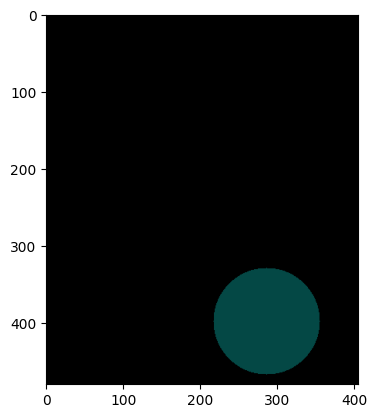

In [50]:
from imp import reload

import individual
reload(individual)
from individual import Individual

parent = Individual()
parent.generate_random_inidividual()

parent.show_image()

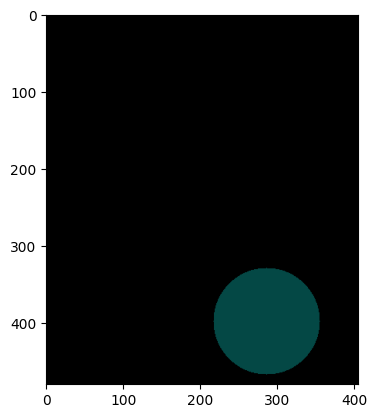

In [51]:
child = copy.deepcopy(parent)
child.show_image()

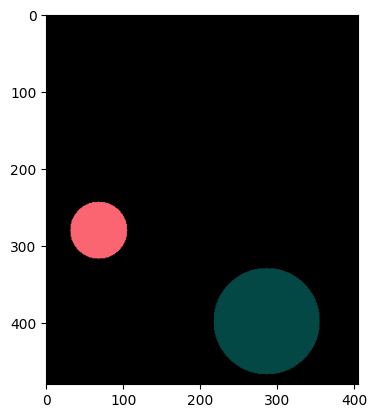

In [52]:
parent.add_splash()
parent.show_image()

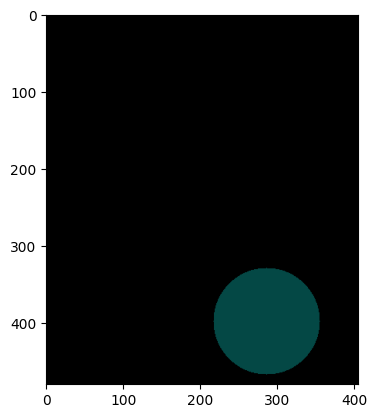

In [53]:
child.show_image()

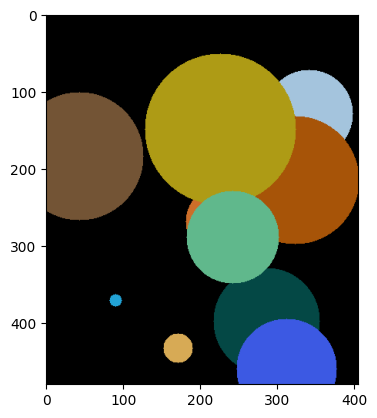

In [63]:
child.add_splash()
child.show_image()

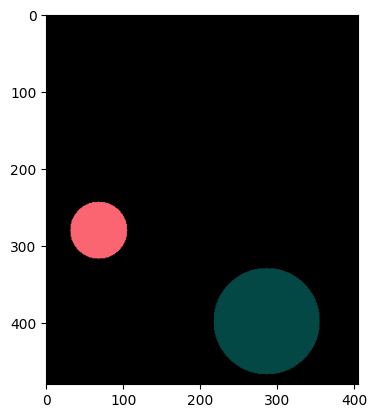

In [64]:
parent.show_image()

## próba zmiany ofrmatu na inny 

52.3111690908 53.3139237211
124.458660566 124.458660566
WYNIK PO KONWERTOWANIU na lab !! 
58.4507343595 61.3604222924


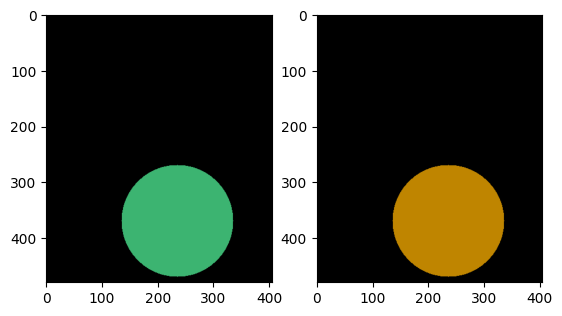

In [143]:
from skimage import io
from splash import Splash
import cv2
import colour

filename = 'pics/GirlwithaPearl.jpg'
target = io.imread(filename)

x_brazowy = Individual()
x_brazowy.generate_random_inidividual()
plamka_brozowa = Splash([191, 133, 0], 1, 370, 235, 100)

x_brazowy.splash_parameters[0] = plamka_brozowa
x_brazowy.pixels_array = x_brazowy.convert_to_pixels_array()


x_roz = Individual()
x_roz.generate_random_inidividual()
plamka_rozowa = Splash([60, 180, 113], 1, 370, 235, 100)

x_roz.splash_parameters[0] = plamka_rozowa
x_roz.pixels_array = x_roz.convert_to_pixels_array()


f, axarr = plt.subplots(1,2)
axarr[0].imshow(x_roz.pixels_array)
axarr[1].imshow(x_brazowy.pixels_array)

fitness1 = np.mean(colour.difference.delta_e.delta_E_CIE2000(np.array(target), np.array(x_roz.pixels_array)))
fitness2 = np.mean(colour.difference.delta_e.delta_E_CIE2000(np.array(target), np.array(x_brazowy.pixels_array)))

max_diff1 = np.max(colour.difference.delta_e.delta_E_CIE2000(np.array(target), np.array(x_roz.pixels_array)))
max_diff2 = np.max(colour.difference.delta_e.delta_E_CIE2000(np.array(target), np.array(x_brazowy.pixels_array)))

print(fitness1, fitness2)
print(max_diff1, max_diff2)

objective_image_lab = cv2.cvtColor(target, cv2.COLOR_RGB2Lab)
brazowy_image_lab = cv2.cvtColor(np.float32(x_brazowy.pixels_array), cv2.COLOR_RGB2Lab)
rozowy_image_lab = cv2.cvtColor(np.float32(x_roz.pixels_array), cv2.COLOR_RGB2Lab)


print('WYNIK PO KONWERTOWANIU na lab !! ')
fitlab1 = np.mean(colour.difference.delta_e.delta_E_CIE2000(np.array(objective_image_lab), np.array(rozowy_image_lab)))
fitlab2 = np.mean(np.mean(colour.difference.delta_e.delta_E_CIE2000(np.array(objective_image_lab), np.array(brazowy_image_lab))))

print(fitlab1, fitlab2)

# testing tworzenia plam na podstawie sredniej z kolorow z obrazka 


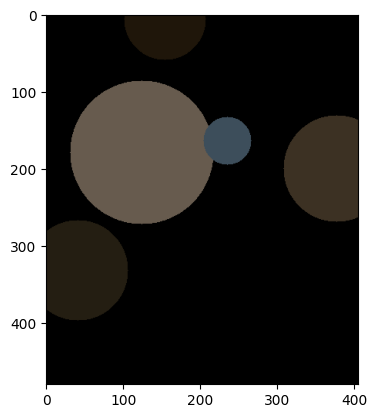

In [289]:
from imp import reload 
import utils 
import individual
reload(individual)
reload(utils)
from utils import Utils 
from individual import Individual

pearl_utils = Utils('pics/GirlwithaPearl.jpg')
x = Individual()
x.generate_random_inidividual(pearl_utils.objective_picture)
x.show_image()